In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [107]:
# https://www.dataknowsall.com/topicmodels.html
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling


 # 1.  Determine how many different topics, and what they are, exist in an aggregation of ALL corpuses together (50 points)

### Install some packages

In [1]:
!pip install gensim==3.8.3

In [2]:
! pip install nltk

In [3]:
!pip install spacy

In [4]:
!pip install tqdm

In [5]:
!pip install pyLDAvis

In [6]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 14.4 MB/s eta 0:00:01     |██████████████████████████▏     | 11.4 MB 14.4 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Load libraries and data file

In [7]:
from pprint import pprint
%matplotlib inline

In [8]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import gensim
from gensim.utils import simple_preprocess
import spacy
from tqdm import tqdm
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt

In [9]:
#read text corpus
df= pd.read_csv('hw2.csv')
data = pd.read_csv("hw2.csv")["body"].to_list()

### Prepare Stopwords

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [11]:
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]


<>:2: DeprecationWarning: invalid escape sequence \S
<>:5: DeprecationWarning: invalid escape sequence \s
<>:2: DeprecationWarning: invalid escape sequence \S
<>:5: DeprecationWarning: invalid escape sequence \s
/var/folders/3x/m9j5lcm97lq9nx_kfbj6r0wc0000gn/T/ipykernel_2716/476429649.py:2: DeprecationWarning: invalid escape sequence \S
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
/var/folders/3x/m9j5lcm97lq9nx_kfbj6r0wc0000gn/T/ipykernel_2716/476429649.py:5: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


### Tokenize words and Clean-up text

In [12]:
data

['WASHINGTON The European Space Agency will establish a committee with representatives from both inside and outside the space industry to develop options for a European human space exploration program The creation of what ESA called a high level advisory group was one of the major outcomes of a one day space summit held in Toulouse France Feb 16 that brought together representatives of member states of both ESA and the European Union to discuss future European space initiatives Josef Aschbacher director general of ESA said the proposal for the advisory group came from French President Emmanuel Macron We got a very clear message from President Macron that such a group is needed He has asked ESA to put the group together he said at a press conference at the end of the summit In a speech earlier in the day Macron mentioned his desire to study options for a European human spaceflight program Between now and summer we want to come up with more specific European targets and ambitions for man

In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [14]:
data_words

[['washington',
  'the',
  'european',
  'space',
  'agency',
  'will',
  'establish',
  'committee',
  'with',
  'representatives',
  'from',
  'both',
  'inside',
  'and',
  'outside',
  'the',
  'space',
  'industry',
  'to',
  'develop',
  'options',
  'for',
  'european',
  'human',
  'space',
  'exploration',
  'program',
  'the',
  'creation',
  'of',
  'what',
  'esa',
  'called',
  'high',
  'level',
  'advisory',
  'group',
  'was',
  'one',
  'of',
  'the',
  'major',
  'outcomes',
  'of',
  'one',
  'day',
  'space',
  'summit',
  'held',
  'in',
  'toulouse',
  'france',
  'feb',
  'that',
  'brought',
  'together',
  'representatives',
  'of',
  'member',
  'states',
  'of',
  'both',
  'esa',
  'and',
  'the',
  'european',
  'union',
  'to',
  'discuss',
  'future',
  'european',
  'space',
  'initiatives',
  'josef',
  'aschbacher',
  'director',
  'general',
  'of',
  'esa',
  'said',
  'the',
  'proposal',
  'for',
  'the',
  'advisory',
  'group',
  'came',
  'from'

In [15]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [16]:
print(trigram_mod[bigram_mod[data_words[1]]])

['bucks_county', 'is', 'rich', 'in', 'history', 'exciting', 'entertainment', 'and', 'family', 'fun', 'bucks_county', 'is', 'home', 'to', 'many', 'places', 'to', 'stay', 'including', 'cozy', 'bed', 'and', 'breakfasts', 'and', 'contemporary', 'hotels', 'thanks', 'to', 'its', 'diverse', 'population', 'bucks_county', 'has', 'become', 'foodie', 'paradise', 'enjoy', 'fun', 'and', 'seasonal', 'festivals', 'throughout', 'bucks_county', 'bucks_county', 'charming', 'towns', 'and', 'main', 'streets', 'are', 'filled', 'with', 'fantastic', 'shopping', 'and', 'culinary', 'delights', 'calling', 'all', 'leaf_peepers', 'as', 'summer', 'fades', 'out', 'and', 'fall', 'bursts', 'in', 'one', 'of', 'the', 'most', 'picturesque', 'places', 'to', 'visit', 'is', 'bucks_county', 'pennsylvania', 'welcome', 'in', 'the', 'colorful', 'foliage', 'of', 'vibrant', 'reds', 'oranges', 'and', 'yellows', 'throughout', 'this', 'sprawling', 'countryside', 'peak', 'fall', 'foliage', 'in', 'bucks_county', 'should', 'occur', 'i

###  Remove Stopwords, Make Bigrams and Lemmatize

In [17]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [18]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [19]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['establish', 'committee', 'representative', 'outside', 'space', 'industry', 'develop', 'option', 'european', 'human', 'space', 'exploration', 'program', 'creation', 'call', 'high', 'level', 'advisory', 'group', 'major', 'outcome', 'day', 'space', 'summit', 'hold', 'bring', 'together', 'representative', 'member', 'discuss', 'future', 'european', 'space', 'initiative', 'say', 'group', 'come', 'french', 'get', 'clear', 'message', 'group', 'need', 'ask', 'together', 'say', 'press', 'conference', 'end', 'summit', 'speech', 'early', 'day', 'macron', 'mention', 'desire', 'study', 'option', 'program', 'summer', 'want', 'come', 'specific', 'european', 'target', 'ambition', 'man', 'space', 'travel', 'say', 'interpreter', 'need', 'know', 'priority', 'datum', 'back', 'prepare', 'choice', 'go', 'take', 'meeting', 'option', 'say', 'include', 'european', 'mission', 'end', 'next', 'decade', 'iss', 'style', 'project', 'bold', 'ambition', 'say', 'fundamental', 'human', 'issue', 'work', 'next', 'decade

### Create the Dictionary and Corpus needed for Topic Modeling

In [20]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [23]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



CalledProcessError: Command 'mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/3x/m9j5lcm97lq9nx_kfbj6r0wc0000gn/T/1982ed_corpus.txt --output /var/folders/3x/m9j5lcm97lq9nx_kfbj6r0wc0000gn/T/1982ed_corpus.mallet' returned non-zero exit status 1.

In [22]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(16,
  [('space', 0.03197158081705151),
   ('resource', 0.021314387211367674),
   ('energy', 0.017317939609236235),
   ('power', 0.015541740674955595),
   ('exploration', 0.015097690941385435),
   ('mod', 0.014653641207815276),
   ('game', 0.014209591474245116),
   ('science', 0.012877442273534635),
   ('planet', 0.012433392539964476),
   ('build', 0.011545293072824156)]),
 (15,
  [('space', 0.0773405698778833),
   ('company', 0.02397105382180009),
   ('private', 0.01990049751243781),
   ('news', 0.015829941203075532),
   ('exploration', 0.015377657168701944),
   ('travel', 0.014020805065581185),
   ('important', 0.014020805065581185),
   ('group', 0.012663952962460425),
   ('earth', 0.012663952962460425),
   ('confidence', 0.012211668928086838)]),
 (14,
  [('image', 0.028455284552845527),
   ('date', 0.0272938443670151),
   ('back', 0.024390243902439025),
   ('find', 0.02032520325203252),
   ('map', 0.018002322880371662),
   ('today', 0.017421602787456445),
   ('join', 0.013937282229

### choose optimal number of topics

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 3170
total tokens: 51701
<10> LL/token: -8.25671
<20> LL/token: -8.02759
<30> LL/token: -7.9888
<40> LL/token: -7.97077

0	25	fall color foliage tree leave view peak red good season park change mile time forest year area state yellow find 
1	25	space steelhead fishing fish river earth mission exploration fly water spacecraft launch moon planet orbit run make astronaut human year 

<50> LL/token: -7.95575
<60> LL/token: -7.94527
<70> LL/token: -7.93995
<80> LL/token: -7.92993
<90> LL/token: -7.92642

0	25	fall color foliage tree leave view peak red good season park change mile forest area state year yellow time find 
1	25	space steelhead fishing fish river earth mission exploration fly spacecraft water launch moon planet orbit run year astronaut human make 

<100> LL/token: -7.92771
<110> LL/token: -7.92279
<120> LL/token: -7.92375
<130> LL/token: -7.92375
<140> LL/token: -7.91886

0	25	fall color foliage tree lea

<60> LL/token: -7.91749
<70> LL/token: -7.90144
<80> LL/token: -7.88861
<90> LL/token: -7.88237

0	6.25	year season time summer early vermont plan include weather make find warm visit report late photo region road world trip 
1	6.25	steelhead fishing fish river run fly water salmon catch angler guide line good trip rod bait winter day weight trout 
2	6.25	provide leave light chlorophyll produce bright service experience temperature accord show report create month plant nation begin find expect day 
3	6.25	space mission exploration launch moon human satellite program earth company technology study orbit research explore include probe mar asteroid crew 
4	6.25	time great make good area low water deep part close offer move spot opportunity back begin condition foot current put 
5	6.25	fall color foliage tree leave peak view red park forest yellow change mountain maple state turn autumn mile oak good 
6	6.25	earth space spacecraft planet astronaut life orbit land system surface scientist r

<410> LL/token: -7.84729
<420> LL/token: -7.85049
<430> LL/token: -7.85162
<440> LL/token: -7.85935

0	6.25	season trip vermont report region include plan year week weather visit make offer photo road drive summer story late state 
1	6.25	steelhead fishing fish river fly run salmon angler catch good guide line winter rod water bait day weight trout trip 
2	6.25	leave year color temperature early change find chlorophyll time produce leaf food accord warm provide begin plant pigment day expect 
3	6.25	space mission exploration human program satellite include company research develop explore earth support asteroid rocket return moon lead agency private 
4	6.25	find water time make great provide area experience good start long move deep foot early opportunity back hold point bring 
5	6.25	fall foliage color tree peak view leave park red forest yellow mountain maple mile turn change oak good orange autumn 
6	6.25	space earth launch spacecraft planet moon orbit astronaut life year mar land c

<760> LL/token: -7.8438
<770> LL/token: -7.8448
<780> LL/token: -7.84552
<790> LL/token: -7.84123

0	6.25	season report vermont trip weather visit include region plan state year make week offer story day photo site information travel 
1	6.25	steelhead fishing fish river fly run salmon catch angler water good line guide rod winter bait day weight trip trout 
2	6.25	leave color fall year early temperature change time red leaf tree chlorophyll warm produce light summer begin high find show 
3	6.25	space mission exploration program human company develop research support lead earth technology agency private international scientific science group woman provide 
4	6.25	time find make area great long water start experience foot back deep good early move part place call home world 
5	6.25	fall foliage color tree peak view park leave yellow forest red mountain maple mile oak turn change orange good trail 
6	6.25	space earth moon launch spacecraft orbit planet astronaut satellite mar station life

<60> LL/token: -7.978
<70> LL/token: -7.94947
<80> LL/token: -7.94569
<90> LL/token: -7.93192

0	3.57143	good time great provide opportunity offer boat world month give stay university area unique open hot central source list today 
1	3.57143	satellite follow technology program include develop provide create scientific science nation united_state hope comment experience plan team state step achieve 
2	3.57143	national make time year plan country weather day region head drive site road travel hour point activity late month arrive 
3	3.57143	color foliage season change leave vermont year report fall autumn state summer early time warm photo week green temperature mountain 
4	3.57143	space system science exploration planet energy force mod challenge game solar environment spaceship rocket station build ground exist long module 
5	3.57143	high date reach lunar part land carry include set time light move line enter complete work speed base rock rate 
6	3.57143	find make start area deep big 

<260> LL/token: -7.89098
<270> LL/token: -7.89039
<280> LL/token: -7.89034
<290> LL/token: -7.89171

0	3.57143	provide opportunity world offer good guide release today free design home unique university lodge access wildlife great impact list prepare 
1	3.57143	program follow include lead development make nation scientific future agency science develop plan people provide information team government commercial united_state 
2	3.57143	trip time plan site travel area country map drive year weather website region visit image late point book matter join 
3	3.57143	foliage color fall peak season leave year vermont change state report summer region week early warm time photo area green 
4	3.57143	space resource exploration energy science power planet mod game build spaceship system module solar large rocket weapon equipment change construction 
5	3.57143	high date part set achieve water begin work light time move speed rate line success sign rock size include arrive 
6	3.57143	find make day 

<460> LL/token: -7.88511
<470> LL/token: -7.88183
<480> LL/token: -7.87374
<490> LL/token: -7.88718

0	3.57143	experience provide opportunity trip wild release design learn unique lodge university idaho world wildlife home guide free share back great 
1	3.57143	program mission develop lead technology include science make project scientific development team nation provide future national commercial partner student work 
2	3.57143	year plan map trip site website point service book information image region traveler access late area month search wind link 
3	3.57143	foliage color fall peak leave season change vermont year good state summer report area region week photo early weather event 
4	3.57143	space resource energy planet power science exploration mod game rocket field solar system module powerful core spaceship structure discover build 
5	3.57143	date high include time part follow set water close line speed rate distance size success present move increase combine rock 
6	3.57143	mak

<660> LL/token: -7.89027
<670> LL/token: -7.88695
<680> LL/token: -7.88817
<690> LL/token: -7.8907

0	3.57143	experience provide opportunity wild season return world release design lodge university unique idaho wildlife list learn guide back photo today 
1	3.57143	program develop include science technology mission lead human make scientific provide nation development project people datum work national team future 
2	3.57143	map story year website site plan service information report summer image traveler visit page click part online satellite search dark 
3	3.57143	foliage fall color peak leave season change vermont state region year area week report early weather visit view good plan 
4	3.57143	space resource exploration energy power science planet mod game discover make start build system module rocket spaceship launch core structure 
5	3.57143	high include time set low line rate give part place distance present combine achieve suggest speed close variety size success 
6	3.57143	day 

<860> LL/token: -7.90392
<870> LL/token: -7.89868
<880> LL/token: -7.89972
<890> LL/token: -7.90654

0	3.57143	provide experience opportunity wild world lodge today release learn unique return university home idaho wildlife access free season design top 
1	3.57143	space exploration mission program human include develop technology make lead science datum satellite national scientific project team work nation government 
2	3.57143	story plan year include site website map information part point late service traveler feature page sign link summer layer term 
3	3.57143	foliage color fall peak leave season change vermont region state report area good week year photo early weather view visit 
4	3.57143	space resource planet science energy power exploration mod game build start spaceship rocket discover make system module core weapon structure 
5	3.57143	line weight time low set close high range good part place give rate move break hold reduce spot size present 
6	3.57143	day make time trip fi

<60> LL/token: -8.06134
<70> LL/token: -8.05861
<80> LL/token: -8.03872
<90> LL/token: -8.03476

0	2.5	space exploration research program development group science news low future station confidence support priority public national knowledge explore earth essential 
1	2.5	space planet moon launch earth mission orbit spacecraft exploration asteroid study surface mar return explore large shuttle rocket test fly 
2	2.5	color leave red tree fall yellow forest leaf green turn maple bright orange aspen autumn oak peak change birch show 
3	2.5	work rate set high book guide quality part make easily natural break support variety speed hand person video spin combine 
4	2.5	mile good place national mountain scenic include tour foot plenty mid time turn spectacular gold large town ride stunning family 
5	2.5	human satellite include develop program company datum lead woman reach carry object united_state scientific government project nation successful soviet_union military 
6	2.5	steelhead fishing 

<210> LL/token: -7.98339
<220> LL/token: -7.99292
<230> LL/token: -7.98004
<240> LL/token: -7.985

0	2.5	space exploration research program news company support human earth development science future group confidence priority spacecraft travel mission essential private_companie 
1	2.5	space planet earth launch moon mission exploration orbit asteroid surface study explore mar return technology station rocket visit land rover 
2	2.5	color red tree fall yellow leave forest leaf maple turn bright autumn aspen mile green oak orange change foliage peak 
3	2.5	guide set rate fresh high variety open hand main access major layer limit rod_tip drag achieve work include map image 
4	2.5	good mountain mile drive place state scenic national country view tour surround spot mid turn offer beautiful include season town 
5	2.5	human satellite program develop make include space lead datum reach object united_state nation scientific race national soviet moon soviet_union woman 
6	2.5	steelhead fishing fi

<360> LL/token: -7.97724
<370> LL/token: -7.98886
<380> LL/token: -7.97526
<390> LL/token: -7.98156

0	2.5	space exploration research company news future support group earth program confidence role man mission essential private_companie human innovation priority top_priority 
1	2.5	planet space earth launch moon orbit mission study asteroid return spacecraft surface mar explore large technology rover world discover life 
2	2.5	color red tree yellow fall forest leave turn maple aspen leaf mile oak peak autumn bright orange green change birch 
3	2.5	set rate include map major access image plan combine open fresh hand point public limit release layer rule real create 
4	2.5	mountain drive beautiful state scenic place mile national include good town country surround road hike tour offer change trip spot 
5	2.5	space exploration human satellite include program develop moon make shuttle united_state reach datum object woman lead race soviet successful flight 
6	2.5	steelhead fishing river fi

<510> LL/token: -7.9702
<520> LL/token: -7.96846
<530> LL/token: -7.96961
<540> LL/token: -7.97418

0	2.5	space research exploration news future company group support program confidence earth astronaut essential private_companie travel priority public private innovation role 
1	2.5	planet mission earth moon launch study asteroid orbit explore space surface return technology rover life mar discover follow visit high 
2	2.5	color red yellow tree forest turn fall bright maple leave aspen mile oak change orange birch show specie foliage northern 
3	2.5	include release rate access set major combine day open unique variety fresh opportunity image limit join point map world real 
4	2.5	mountain mile drive good place beautiful state trip scenic country view road national town surround tour hike autumn include spot 
5	2.5	space exploration human satellite program include earth moon develop lead reach shuttle make datum nation development united_state national object government 
6	2.5	steelhead 

<660> LL/token: -7.97493
<670> LL/token: -7.97151
<680> LL/token: -7.97133
<690> LL/token: -7.95752

0	2.5	space research exploration company news group program confidence priority role important essential earth private_companie support future private station top_priority public 
1	2.5	planet earth launch study mission asteroid surface orbit explore technology rover life moon return large visit discover achieve image student 
2	2.5	red color yellow forest tree maple fall turn bright leave mile aspen oak orange birch change peak mountain northern brilliant 
3	2.5	release open access world fresh major today join image point unique include rate combine limit protect map wild locate drive 
4	2.5	place mountain drive beautiful good view scenic state country trip mile national road town include turn surround tour hike spot 
5	2.5	space exploration satellite human program moon include make lead earth united_state shuttle reach object datum develop nation government travel soviet_union 
6	2.5	

<810> LL/token: -7.9691
<820> LL/token: -7.97887
<830> LL/token: -7.96444
<840> LL/token: -7.97111

0	2.5	space exploration research company news group program confidence private essential important role top_priority private_companie priority interested support station travel mission 
1	2.5	planet mission study asteroid earth launch explore technology life rover moon surface visit return atmosphere orbit sample mar science discover 
2	2.5	red color yellow turn tree maple forest mile bright aspen orange oak fall leave birch change show peak brilliant mountain 
3	2.5	world image release plan fresh unique rate combine locate include visit today major map limit additional layer access wild size 
4	2.5	fall mountain view beautiful state drive place scenic trip road national mile country include surround offer mid tour hike gold 
5	2.5	space exploration earth human satellite moon program include make develop datum reach object flight travel mission united_state nation woman scientific 
6	2.5

<960> LL/token: -7.97792
<970> LL/token: -7.97686
<980> LL/token: -7.97418
<990> LL/token: -7.97254

0	2.5	space research exploration company news group program confidence priority private center essential private_companie role earth low important top_priority country support 
1	2.5	planet mission earth study launch asteroid mar surface explore technology rover return large life image visit student sample exploration atmosphere 
2	2.5	red yellow color tree turn forest fall maple bright orange mile aspen leave oak birch peak colorful brilliant show change 
3	2.5	include release unique point plan access world open image visit map wild limit prepare level coastal join adventure major layer 
4	2.5	fall view mountain state mile drive beautiful scenic place make national road trip autumn surround country offer hike good tour 
5	2.5	space human exploration orbit moon satellite earth include program develop make reach shuttle object datum nation lead flight united_state woman 
6	2.5	steelhead 

<110> LL/token: -8.04389
<120> LL/token: -8.03389
<130> LL/token: -8.02785
<140> LL/token: -8.02143

0	1.92308	year date mile fly enter minute call back site american saturn schedule world nation cloud venus discovery show formation step 
1	1.92308	steelhead fishing fish river run fly catch guide trout make trip float salmon work small size close big hand good 
2	1.92308	resource power planet game solar start build protect module core equipment deep cargo structure moon size work construction powerful station 
3	1.92308	report state year photo website information service site provide continue location field change part department free online link offer remain 
4	1.92308	angler bait water area spawn boat deep summer section creek technique egg great find current easily action effective ocean feed 
5	1.92308	red yellow color fall maple oak turn tree orange mile aspen foliage bright forest leave birch high brilliant peak anthocyanin 
6	1.92308	park tree view trail fall lake forest learn c

<260> LL/token: -7.99547
<270> LL/token: -7.99716
<280> LL/token: -7.98085
<290> LL/token: -7.99418

0	1.92308	year date shuttle mile fly design minute enter service mark saturn cloud schedule nation american back venus image close rocket 
1	1.92308	steelhead fishing fish river run catch fly guide trout trip salmon make pound hook spring method condition stream fishery big 
2	1.92308	resource planet build power game rocket start module system solar moon launch spaceship core protect equipment large cargo structure surface 
3	1.92308	report state year photo part website information free condition continue change past region site field move copyright current location service 
4	1.92308	angler bait egg deep area section water find boat technique channel effective spawn color bright side action bite easily current 
5	1.92308	red yellow color turn maple tree mile aspen fall oak leave forest orange birch bright peak foliage colorful show brilliant 
6	1.92308	park tree view trail fall forest 

<410> LL/token: -7.99313
<420> LL/token: -7.99878
<430> LL/token: -8.0006
<440> LL/token: -7.98339

0	1.92308	year date fly enter shuttle mile world hope half design service close back american schedule size hour site light red 
1	1.92308	steelhead fish fishing river run angler catch guide fly trout salmon trip boat spawn make fishery big pound good stream 
2	1.92308	planet build power game exploration rocket start spaceship module protect solar system discover make powerful cargo moon launch equipment deep 
3	1.92308	report year information photo event part website visit service work change remain location state recreation current move online continue condition 
4	1.92308	bait area egg water long technique find foot deep add lure provide quality easily color channel effective make bright drift 
5	1.92308	yellow red color tree mile turn maple aspen orange forest bright leave fall oak birch peak mountain colorful green show 
6	1.92308	park tree fall trail view forest scenic city oak lak

<560> LL/token: -7.99201
<570> LL/token: -8.00622
<580> LL/token: -7.99507
<590> LL/token: -8.00959

0	1.92308	year date fly shuttle mile back hope light hour service land american schedule nation world deliver red published_february formation age 
1	1.92308	steelhead fish fishing river run angler guide trout fly catch trip salmon spawn boat make method pound fishery stream opportunity 
2	1.92308	planet exploration make build power rocket solar system launch distance start module large set core spaceship cargo construction moon change 
3	1.92308	report year information visit photo website part event change find provide free condition recreation work continue service location move current 
4	1.92308	water bait area good deep egg section long technique catch lure current provide add channel cast find choose pool effective 
5	1.92308	yellow red color turn tree fall maple orange bright oak leave forest aspen mile birch show peak green purple mountain 
6	1.92308	park tree trail fall view fo

<710> LL/token: -7.98443
<720> LL/token: -7.99101
<730> LL/token: -7.99307
<740> LL/token: -7.97679

0	1.92308	year date fly back shuttle land mile company hope american schedule design site test offer age deliver world hour formation 
1	1.92308	steelhead fish fishing river run angler catch guide fly trout trip make boat water salmon spawn fishery stream method pound 
2	1.92308	planet exploration system build make large solar power launch moon discover start module ice distance spaceship energy station core return 
3	1.92308	report year information visit photo event find change website service location plan free current recreation remain high rights_reserve part base 
4	1.92308	bait water good egg area section find long deep lure cast option size channel effective strike add depend choose bite 
5	1.92308	red color yellow turn maple mile tree fall bright leave orange aspen oak forest birch mountain show peak new_england green 
6	1.92308	park tree trail fall forest view lake oak city lea

<860> LL/token: -7.99667
<870> LL/token: -7.98627
<880> LL/token: -7.98285
<890> LL/token: -7.98464

0	1.92308	year date fly company mile shuttle design land back service nation step hope show half age deliver schedule hour safely 
1	1.92308	steelhead fish fishing river run angler catch guide trout fly salmon water stream boat fishery trip big creek method opportunity 
2	1.92308	planet exploration large system power build long station solar make field start place surface module launch moon distance powerful ice 
3	1.92308	vermont report year season photo event find visit part change high recreation plan past service rights_reserve copyright location planning live 
4	1.92308	bait water area egg deep section find lure spawn good long foot summer technique cast current enter bright add effective 
5	1.92308	yellow red color tree fall orange turn maple oak mile aspen birch forest bright peak show leave south new_england purple 
6	1.92308	tree park trail view forest fall city mile maple oak 

Mallet LDA: 32 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 3170
total tokens: 51701
<10> LL/token: -8.75205
<20> LL/token: -8.38339
<30> LL/token: -8.26234
<40> LL/token: -8.20335

0	1.5625	steelhead fishing fish river run water angler line fly day stream trout boat hold size large technique creek lure reel 
1	1.5625	life reach find water system time begin number force result base environment food long make gravity small exist provide thing 
2	1.5625	catch guide bait trip find make good spawn time egg water fishing fishery fish section day provide gear channel big 
3	1.5625	moon mission satellite human launch space probe orbit make crew surface telescope plan conduct government successful complete commercial robotic step 
4	1.5625	summer time late temperature cold drop accord start long point edge source small cover rise zone published_february average break happen 
5	1.5625	research explore lunar develop mission news important man work team university role private_

<110> LL/token: -8.05286
<120> LL/token: -8.04113
<130> LL/token: -8.03646
<140> LL/token: -8.03443

0	1.5625	steelhead fishing fish river run angler water fly trout winter stream hold boat technique lure creek spring section small pound 
1	1.5625	life radiation long system air force water exist scientist gravity reach atmosphere find sun pressure food surface future live result 
2	1.5625	catch guide trip find make bait good provide egg offer condition big area hard fishing check type choose easily method 
3	1.5625	mission human satellite moon launch probe crew include orbit surface reach object make plan carry soviet_union follow lead high spaceflight 
4	1.5625	time day begin summer temperature early warm month start thing close cold point accord drop arrive short cool dry bring 
5	1.5625	research support life world nation work news man project role engineering time develop generation private_companie system good american woman orbit 
6	1.5625	email follow good comment new_post pretty

<210> LL/token: -8.01205
<220> LL/token: -8.01076
<230> LL/token: -8.01404
<240> LL/token: -8.01125

0	1.5625	steelhead fishing fish river run angler fly bait water trout spawn winter stream lure creek small boat tip pound season 
1	1.5625	life scientist radiation force surface air long system find food pressure exist atmosphere future water reach cabin oxygen kilometer temperature 
2	1.5625	catch guide trip make find provide offer salmon check big egg area hard feel condition method choose book effective charter 
3	1.5625	satellite human probe surface mission include reach program crew object soviet plan datum soviet_union launch woman lead commercial spaceflight successful 
4	1.5625	time day begin early warm accord thing temperature month cold close happen drop summer spring end include cool weather start 
5	1.5625	research support man work nation life continue time world project find american role generation astronaut safely good important view play 
6	1.5625	winter follow good emai

<310> LL/token: -8.00163
<320> LL/token: -8.00141
<330> LL/token: -8.00636
<340> LL/token: -8.01349

0	1.5625	steelhead fishing fish river run angler fly water bait trout winter spawn stream boat salmon technique small lure pound creek 
1	1.5625	earth spacecraft radiation life astronaut scientist system air atmosphere future environment force surface food body exist long find spaceflight reach 
2	1.5625	catch guide find make trip provide big egg book gear area offer method hard ocean effective full easily charter hand 
3	1.5625	satellite probe reach mission object travel launch soviet begin lead woman surface follow military make spaceflight observation include human commercial 
4	1.5625	time day year begin warm month end leave early accord thing cold temperature result hour start short long spring include 
5	1.5625	research support continue man nation world work project datum people role life conduct range knowledge view safely time find american 
6	1.5625	winter good email follow com

<410> LL/token: -8.00425
<420> LL/token: -8.00571
<430> LL/token: -7.99568
<440> LL/token: -7.99884

0	1.5625	steelhead fishing fish river run angler bait fly trout water stream winter technique lure small boat salmon spawn pound hook 
1	1.5625	earth life spacecraft astronaut radiation system scientist long air exist force atmosphere find spaceflight future suit food surface travel form 
2	1.5625	guide catch trip make find offer time thing put big gear fishing egg method provide feel easily book option hard 
3	1.5625	satellite probe human reach object make lead soviet woman large surface mission soviet_union travel asteroid observation voyager successful enter spaceflight 
4	1.5625	day time early warm year temperature begin month accord end cold long happen find close hour start spring grow drop 
5	1.5625	research support man nation work include project datum people continue send view knowledge set world age play find good question 
6	1.5625	winter good email follow comment time sectio

<510> LL/token: -8.0037
<520> LL/token: -8.00393
<530> LL/token: -8.00924
<540> LL/token: -8.00789

0	1.5625	steelhead fishing fish river run angler fly bait water trout spawn stream salmon boat small winter technique size fishery large 
1	1.5625	life spacecraft earth astronaut scientist long radiation air water force atmosphere food gravity pressure exist future spaceflight large cabin danger 
2	1.5625	guide catch trip make find provide day offer book easily big time good land check full egg easy zone charter 
3	1.5625	satellite human make probe reach travel object lead surface soviet datum large military soviet_union woman follow spaceflight voyager asteroid enter 
4	1.5625	time day early begin warm find year thing month long cold accord weather hour temperature short end drop people back 
5	1.5625	research nation project life people american work scientific age play continue set future view good decade datum world range possibility 
6	1.5625	winter email good follow time comment sec

<610> LL/token: -8.01553
<620> LL/token: -8.00913
<630> LL/token: -8.00499
<640> LL/token: -8.00073

0	1.5625	steelhead fishing fish river run angler fly bait trout water winter spawn salmon stream boat technique great tip creek large 
1	1.5625	life astronaut spacecraft scientist radiation earth air exist environment atmosphere system force long star food travel spaceflight water future suit 
2	1.5625	guide catch make trip time find day big book provide easy offer hand hard thing easily full egg method effective 
3	1.5625	satellite reach object travel soviet woman soviet_union probe make begin spaceflight surface large military voyager successful enter datum develop sun 
4	1.5625	day early year time start temperature warm month accord begin find long hour cold people thing end arrive short weather 
5	1.5625	research nation project future life safely scientific set question people work age american continue offer good major degree play view 
6	1.5625	good email follow comment summer new

<710> LL/token: -8.00644
<720> LL/token: -8.01034
<730> LL/token: -7.99098
<740> LL/token: -8.01542

0	1.5625	steelhead fishing fish river run angler fly bait trout winter salmon spawn water stream boat creek technique hook pound small 
1	1.5625	space earth spacecraft life radiation astronaut scientist air spaceflight environment move atmosphere force large future system star cabin pressure food 
2	1.5625	guide catch trip make find time provide good day offer method egg book big gear hand easy easily feel fast 
3	1.5625	satellite reach surface travel object datum soviet woman soviet_union image begin make voyager successful observation follow enter observe asteroid neptune 
4	1.5625	find year time day early month warm begin temperature cold accord end start result thing spring hour people short live 
5	1.5625	research people nation question project future continue scientific make work life set group play view safely decade degree offer partner 
6	1.5625	good email follow comment winter

<810> LL/token: -8.00234
<820> LL/token: -7.99657
<830> LL/token: -7.98632
<840> LL/token: -8.00371

0	1.5625	steelhead fishing fish river run angler fly trout bait water spawn salmon winter boat technique creek float tip fishery pound 
1	1.5625	earth radiation life astronaut air spacecraft scientist long move future force water exist environment cabin atmosphere food condition body kilometer 
2	1.5625	guide catch find make trip provide offer full time egg book land good gear day easy thing easily method break 
3	1.5625	satellite reach earth object make landing soviet woman datum crew successful surface soviet_union observation voyager probe spaceflight image mar system 
4	1.5625	time year find day early temperature begin small number month warm cold accord spring people hour thing drop end live 
5	1.5625	nation research work program scientific make decade continue set project question partner industry group people push play view datum operate 
6	1.5625	good follow email comment place 

<910> LL/token: -8.00631
<920> LL/token: -8.01072
<930> LL/token: -8.00053
<940> LL/token: -7.99852

0	1.5625	steelhead fish fishing river run angler water fly trout salmon spawn stream boat large great work fishery pound tip big 
1	1.5625	life radiation earth spacecraft scientist water system air astronaut environment force future atmosphere long find suit cabin pressure food move 
2	1.5625	catch guide trip make find provide time easy offer gear book bait method easily simply option effective land full check 
3	1.5625	reach travel surface object woman landing soviet enter image make datum voyager spaceflight successful satellite crew observation large sun observe 
4	1.5625	time day find year begin early month temperature cold warm thing accord back spring end small life start big result 
5	1.5625	work research scientific make nation set decade project major datum good partner continue group european goal american degree engineering society 
6	1.5625	follow email read good comment wint

Mallet LDA: 38 topics, 6 topic bits, 111111 topic mask
Data loaded.
max tokens: 3170
total tokens: 51701
<10> LL/token: -8.81325
<20> LL/token: -8.4181
<30> LL/token: -8.3172
<40> LL/token: -8.2397

0	1.31579	steelhead fishing fish river fly run angler salmon line water winter trout cast drift hook guide spawn bottom stream start 
1	1.31579	confidence center low top_priority private lot climate half attentive tend share year monitor make happen country strong remain associate trend 
2	1.31579	provide include government world support develop knowledge essential priority agency effort benefit health compare tourism travel private_companie information military understand 
3	1.31579	date fly landing mile hope back year day return live start long orion give begin advanced crew light harbor partner 
4	1.31579	space spacecraft earth human orbit probe shuttle spaceflight international begin year develop plan vehicle program soviet reach step cost private 
5	1.31579	moon launch planet mission m

<110> LL/token: -8.12311
<120> LL/token: -8.10853
<130> LL/token: -8.11527
<140> LL/token: -8.1009

0	1.31579	steelhead fishing fish river fly angler run guide trout drift cast day spawn bottom trip float size start stream hook 
1	1.31579	company news confidence research support priority essential private_companie top_priority private low attentive express tend share woman learn mission man monitor 
2	1.31579	people include information government agency knowledge support provide effort develop benefit world education question military offer serve sky ability resource 
3	1.31579	year date mile hope day fly time back include return live land show hour set week start sea measure famous 
4	1.31579	space spacecraft orbit earth launch human moon mar crew probe rocket shuttle international carry object begin send commercial soviet race 
5	1.31579	planet mission earth launch study asteroid surface satellite moon explore mar apollo woman sample technology man atmosphere voyager planetary image 

<210> LL/token: -8.07198
<220> LL/token: -8.07872
<230> LL/token: -8.07948
<240> LL/token: -8.0611

0	1.31579	steelhead fishing fish river fly run angler catch guide cast trout make spawn day salmon float start winter hook trip 
1	1.31579	space company news exploration research confidence private_companie essential top_priority priority support private attentive survey role man station interested compare lot 
2	1.31579	agency people government knowledge national effort resource benefit provide activity develop question public capture ability serve information military education capability 
3	1.31579	year fly land date return mile hope day hour back live minute life week receive people show month formation photograph 
4	1.31579	space spacecraft orbit earth moon mission launch human crew probe mar make rocket satellite program international begin shuttle send travel 
5	1.31579	planet mission launch study earth asteroid explore surface mar orbit moon technology woman sample image man retu

<310> LL/token: -8.0532
<320> LL/token: -8.05688
<330> LL/token: -8.05175
<340> LL/token: -8.06036

0	1.31579	steelhead fishing fish river fly angler catch run guide make trout trip spawn winter float hook great start opportunity egg 
1	1.31579	space company exploration news research confidence private_companie essential top_priority private man priority support attentive lot interested low country role express 
2	1.31579	people national provide government activity information effort knowledge benefit include increase begin flight united_state capture weather public military serve operation 
3	1.31579	date day land year fly live hour find mile return minute back site show week walk ride spend formation transmit 
4	1.31579	space earth spacecraft orbit mission moon human launch mar rocket probe make crew program send planet shuttle carry travel satellite 
5	1.31579	planet mission earth study launch asteroid explore surface rover woman return moon sample image atmosphere voyager planetary

<410> LL/token: -8.04867
<420> LL/token: -8.05063
<430> LL/token: -8.0499
<440> LL/token: -8.0606

0	1.31579	steelhead fishing fish river fly angler catch guide make trout winter spawn float start great spring day egg cast method 
1	1.31579	space company news exploration confidence research essential private private_companie priority top_priority low attentive generation conduct lot woman interested support man 
2	1.31579	national include activity people provide government knowledge benefit effort country support understand capture important military serve united_state early century weather 
3	1.31579	date year day land find back live hour minute walk mile show fly significant speed people site flight measure spend 
4	1.31579	space spacecraft earth orbit moon human satellite mission mar probe launch make crew program flight rocket shuttle begin travel send 
5	1.31579	planet mission launch earth study surface explore asteroid life orbit rover sample mar woman image moon atmosphere plane

<510> LL/token: -8.04311
<520> LL/token: -8.04402
<530> LL/token: -8.03968
<540> LL/token: -8.03375

0	1.31579	steelhead fishing fish river angler catch guide fly make trout run winter spawn salmon float start hook egg drift spring 
1	1.31579	space company news exploration confidence earth essential private research top_priority private_companie man support priority attentive interested compare public station world 
2	1.31579	government national people benefit provide early activity knowledge global serve capture potential military application important effort private base push united_state 
3	1.31579	date find mile year land day live back send minute show hour walk flight spend week age speed transmit determine 
4	1.31579	space spacecraft orbit moon earth human launch crew mission probe make program satellite mar include develop shuttle begin flight rocket 
5	1.31579	mission planet study launch earth asteroid rover mar return explore surface life moon orbit sample planetary image atmo

<610> LL/token: -8.04507
<620> LL/token: -8.03453
<630> LL/token: -8.04605
<640> LL/token: -8.042

0	1.31579	steelhead fishing fish river angler catch fly run winter trout guide make spawn float hook method start salmon gear drift 
1	1.31579	space company news confidence exploration essential low travel priority private_companie top_priority private research earth spacecraft generation survey attentive interested lot 
2	1.31579	provide government national people activity benefit military capture study event purpose knowledge power century application serve recent datum navigation operation 
3	1.31579	date land find live year back mile hour minute day walk light spend speed age half call picture time ice 
4	1.31579	space orbit earth spacecraft mission human moon satellite launch probe mar flight make include rocket crew shuttle program send reach 
5	1.31579	planet mission study launch earth surface asteroid explore life rover sample moon atmosphere planetary orbiter return image mar wor

<710> LL/token: -8.04184
<720> LL/token: -8.04098
<730> LL/token: -8.03931
<740> LL/token: -8.03833

0	1.31579	steelhead fishing fish river angler catch run guide winter make trout fly spawn find method hook start summer_run tip specie 
1	1.31579	space company news confidence exploration research essential private priority top_priority private_companie role important man earth country travel attentive spacecraft put 
2	1.31579	provide national activity lead government people knowledge develop benefit military capture information low development datum satellite power potential united_state purpose 
3	1.31579	date land call minute back find day mile walk hour year live flight ice age show receive measure spend red 
4	1.31579	space earth orbit moon spacecraft human mission launch satellite mar make include flight rocket shuttle probe carry begin send international 
5	1.31579	planet mission study asteroid surface earth launch rover life probe atmosphere mar sample planetary orbit orbiter s

<810> LL/token: -8.03914
<820> LL/token: -8.03142
<830> LL/token: -8.03333
<840> LL/token: -8.03223

0	1.31579	steelhead fishing fish river angler catch guide winter make trout fly spawn find start tip hook method summer_run rainbow_trout target 
1	1.31579	space news company exploration confidence research essential private_companie private top_priority priority interested attentive tourism man country generation public continue earth 
2	1.31579	people government military knowledge activity begin united_state capture provide serve national benefit potential effort early important global recent event point 
3	1.31579	date find year land back day live mile minute hour call ice send walk spend red show measure age determine 
4	1.31579	space earth spacecraft orbit moon human mission launch satellite planet astronaut station mar flight make travel rocket international shuttle land 
5	1.31579	mission study planet launch asteroid rover probe earth surface mar life sample planetary explore ima

<910> LL/token: -8.04185
<920> LL/token: -8.03317
<930> LL/token: -8.02146
<940> LL/token: -8.04025

0	1.31579	steelhead fishing fish river angler catch guide winter trout fly make salmon spawn start find hook tip method target spring 
1	1.31579	space news company exploration research confidence essential private private_companie priority top_priority role man important earth low attentive compare spacecraft interested 
2	1.31579	people government activity military knowledge national global development significant capture serve benefit effort potential application support navigation purpose achievement united_state 
3	1.31579	date find year land back day minute mile call live walk hour week time important age person red half pay 
4	1.31579	space orbit earth spacecraft human moon satellite launch mission planet mar make flight astronaut develop rocket include shuttle program crew 
5	1.31579	mission planet launch earth study asteroid life rover probe surface mar orbit sample planetary ex

In [31]:
x = [2,8,14,....]

range(2, 40, 6)

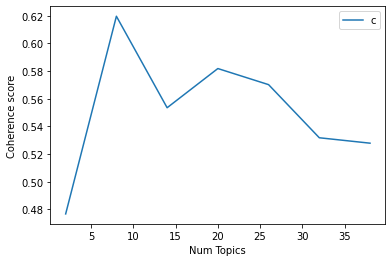

In [25]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# optimal model has # topics = 8 

In [32]:
model_list

In [27]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"report" + 0.016*"year" + 0.016*"vermont" + 0.016*"season" + '
  '0.014*"trip" + 0.013*"region" + 0.012*"plan" + 0.012*"visit" + 0.011*"week" '
  '+ 0.011*"weather"'),
 (1,
  '0.083*"steelhead" + 0.058*"fishing" + 0.049*"fish" + 0.038*"river" + '
  '0.022*"fly" + 0.021*"run" + 0.016*"salmon" + 0.015*"catch" + 0.015*"angler" '
  '+ 0.013*"line"'),
 (2,
  '0.031*"color" + 0.024*"leave" + 0.017*"tree" + 0.017*"fall" + '
  '0.015*"change" + 0.014*"early" + 0.014*"time" + 0.014*"temperature" + '
  '0.014*"year" + 0.011*"chlorophyll"'),
 (3,
  '0.070*"space" + 0.029*"exploration" + 0.014*"program" + 0.013*"research" + '
  '0.012*"human" + 0.012*"company" + 0.012*"mission" + 0.011*"develop" + '
  '0.008*"support" + 0.008*"lead"'),
 (4,
  '0.031*"time" + 0.025*"find" + 0.020*"make" + 0.018*"water" + 0.018*"long" + '
  '0.017*"great" + 0.015*"area" + 0.013*"deep" + 0.013*"start" + 0.012*"back"'),
 (5,
  '0.047*"fall" + 0.040*"foliage" + 0.028*"color" + 0.024*"tree" + '
  '0.023*"v

# 2.  Once you get a the list of topics, assign each corpus to a topic through an automated tagging process (assign each corpus to a topic) of your choice (50 points)

In [30]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

/var/folders/2l/by01phcx48j_c1bjscpfmcc00000gn/T/ipykernel_70309/3966538752.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/2l/by01phcx48j_c1bjscpfmcc00000gn/T/ipykernel_70309/3966538752.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.5917,"space, exploration, program, research, human, ...",WASHINGTON The European Space Agency will esta...
1,1,5,0.5011,"fall, foliage, color, tree, view, peak, park, ...",Bucks County is rich in history exciting enter...
2,2,1,0.8020,"steelhead, fishing, fish, river, fly, run, sal...",Steelhead Fishing Pulaski NY on the Salmon Riv...
3,3,3,0.5676,"space, exploration, program, research, human, ...",Since the beginning of time exploring the Univ...
4,4,1,0.6073,"steelhead, fishing, fish, river, fly, run, sal...",231 519 7348 Steelhead fishing is a popular s...
...,...,...,...,...,...
119,119,5,0.6146,"fall, foliage, color, tree, view, peak, park, ...",Central Park New York City Vibrant Peak Folia...
120,120,1,0.4315,"steelhead, fishing, fish, river, fly, run, sal...",Chrome Chasers Wild Steelhead Fishing in South...
121,121,6,0.2337,"space, earth, moon, launch, mission, spacecraf...",The only planet we know of inhabited entirely ...
122,122,6,0.5876,"space, earth, moon, launch, mission, spacecraf...",From lunar missions to anti asteroid defence s...


In [ ]:
# Dominant_Topic is the result needed for Q2